In [16]:
# Evolution des genres dans le temps
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load movies data
data_folder = '../data/MovieSummaries'
df_metadata = pd.read_csv(data_folder + '/movies_metadata_cleaned_genres.csv')

In [18]:
# Identify NaNs and remove them
problematic_values = []
for index, value in df_metadata['Grouped_genres'].items(): 
    if isinstance(value, str):
        try:
            ast.literal_eval(value)
        except (ValueError, SyntaxError):
            problematic_values.append((index, value))

            
df_metadata = df_metadata.drop([index for index, _ in problematic_values])

In [19]:
# Count of Genres per decade

#Expand the genres
df_metadata['Grouped_genres'] = df_metadata['Grouped_genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_expanded = df_metadata.explode('Grouped_genres')

# Group by 'Decade' and 'Movie_genres' and count occurrences
genre_distribution = df_expanded.groupby(['Decade', 'Grouped_genres']).size().reset_index(name="Count")

# Sort 'Decade' and 'Count' in descending order
genre_distribution = genre_distribution.sort_values(by=['Decade', 'Count'], ascending=[True, False])

In [32]:

def plot_top_genres(top_x):
    """
    Plot the top x genres per decade with unique colors for each genre.

    Arguments:
        top_x: the number of top genres per decade
    """
    # Top x genres per decade
    top_x_genres_per_year = genre_distribution.groupby(['Decade']).head(top_x)

    # Normalize the counts 
    decade_totals = top_x_genres_per_year.groupby('Decade')['Count'].transform('sum')
    top_x_genres_per_year = top_x_genres_per_year.copy()  # to avoid warnings
    top_x_genres_per_year['Percentage'] = (top_x_genres_per_year['Count'] / decade_totals) * 100

    # Pivot the data for the stacked bar chart
    top_genres_normalized = top_x_genres_per_year.pivot(index='Decade', columns='Grouped_genres', values='Percentage').fillna(0)

    # Color palette with color for each genre
    unique_genres = top_genres_normalized.columns
    colors = sns.color_palette("Spectral", n_colors=len(unique_genres))  # "cubehelix" for more distinct colors
    genre_colors = dict(zip(unique_genres, colors))

    # Plot the data as a stacked bar chart
    plt.figure(figsize=(14, 8))
    top_genres_normalized.plot(
        kind='bar',
        stacked=True,
        color=[genre_colors[genre] for genre in top_genres_normalized.columns], 
        width=0.8,
        ax=plt.gca()
    )

    plt.title(f'Top {top_x} Movie Genres By Decade')
    plt.xlabel('Decade')
    plt.ylabel('Percentage of Total Genres (%)')
    plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid()
    plt.show()

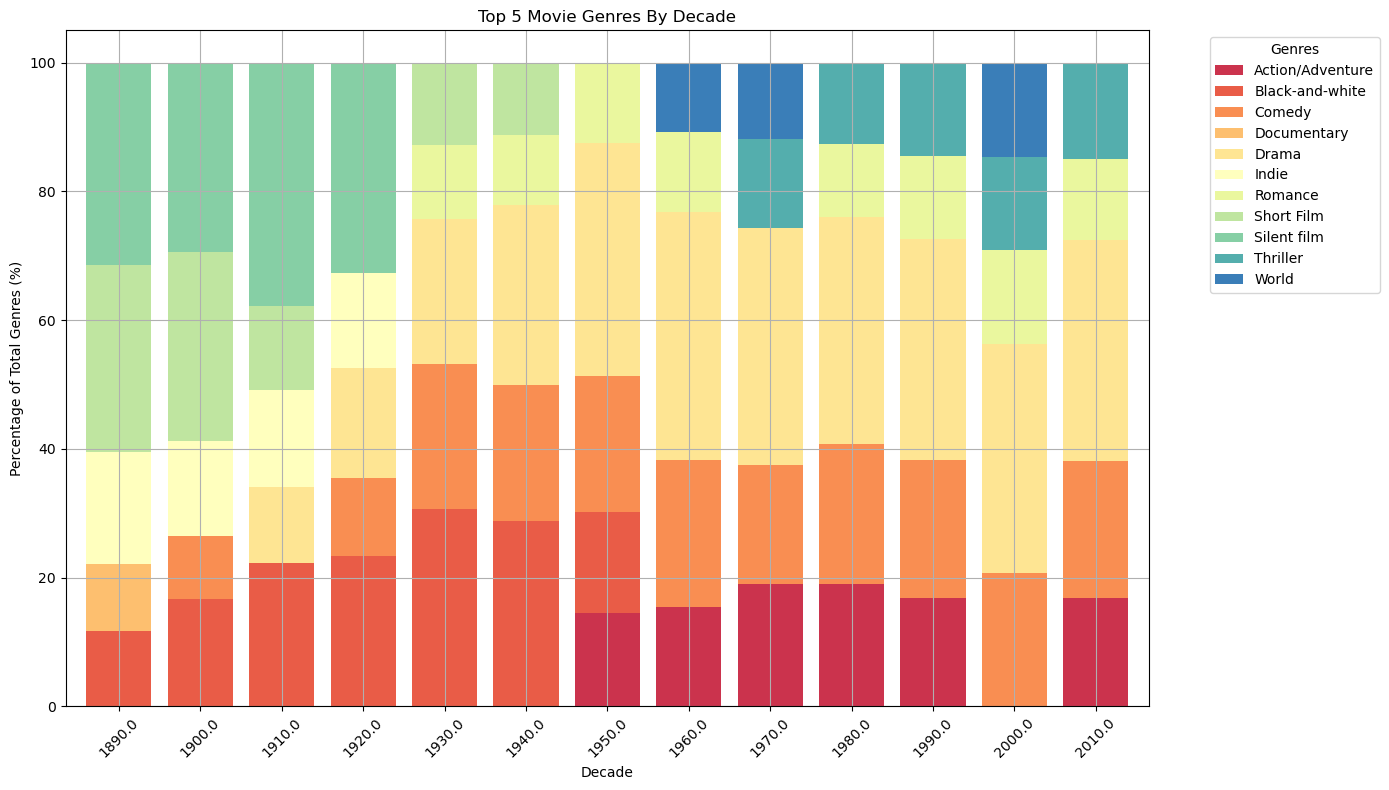

In [33]:
plot_top_genres(5)

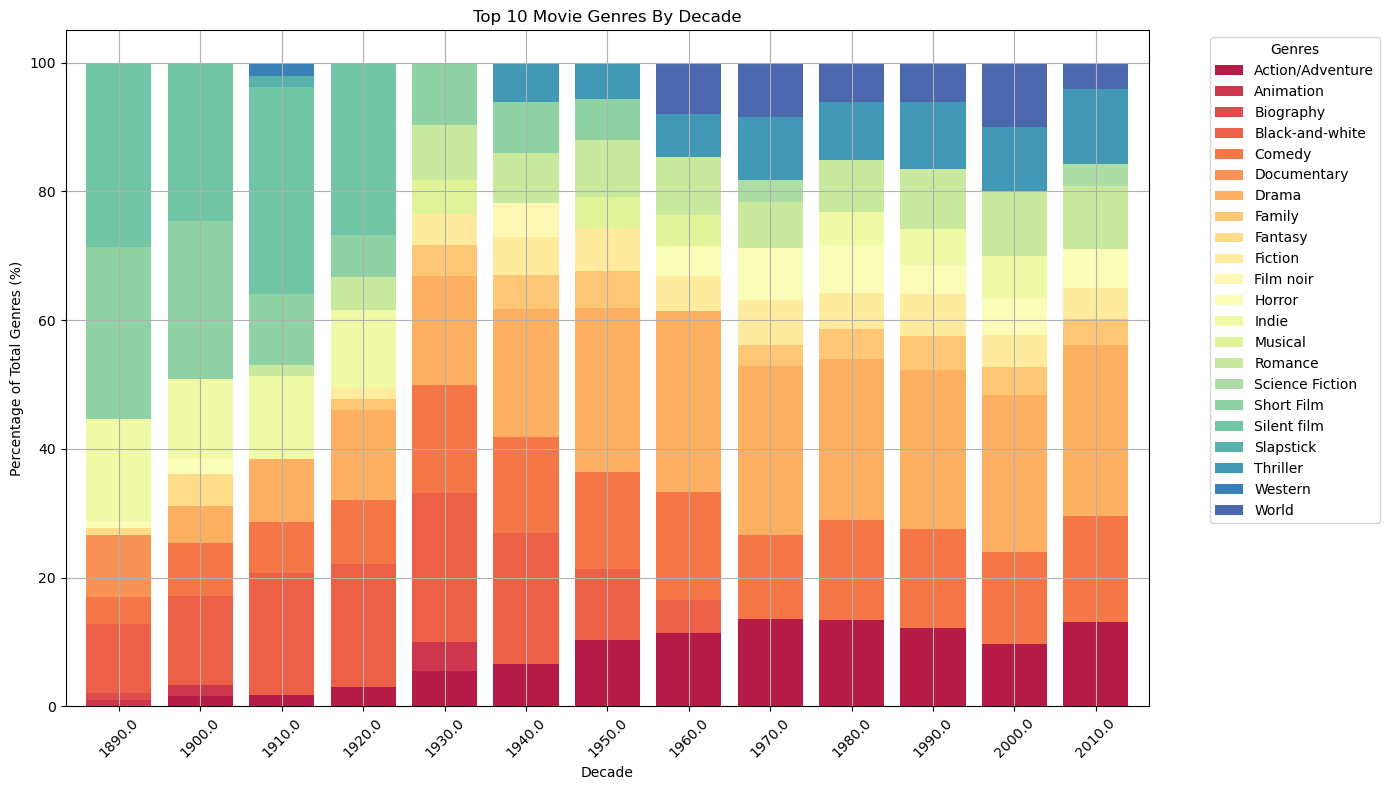

In [34]:
plot_top_genres(10)

In [41]:
all_genre_distr = df_expanded.groupby(['Grouped_genres']).size().reset_index(name="Count")
all_genre_distr = all_genre_distr.sort_values(by=['Count'], ascending=False)
all_genre_distr.to_csv("all_genre_distr")

In [42]:
def plot_top_genres_overall(x):
    """
    Plot a pie chart for the top x genres overall.

    Arguments:
        x: the number of top genres to display
    """
    # Get the top x genres overall
    top_x_genre_overall = all_genre_distr.head(x)

    # Plot with pie chart
    plt.figure(figsize=(10, 10))
    plt.pie(
        top_x_genre_overall['Count'], 
        labels=top_x_genre_overall['Grouped_genres'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("tab20", len(top_x_genre_overall))
    )

    # Title and display
    plt.title(f'Top {x} Movie Genres Overall')
    plt.show()

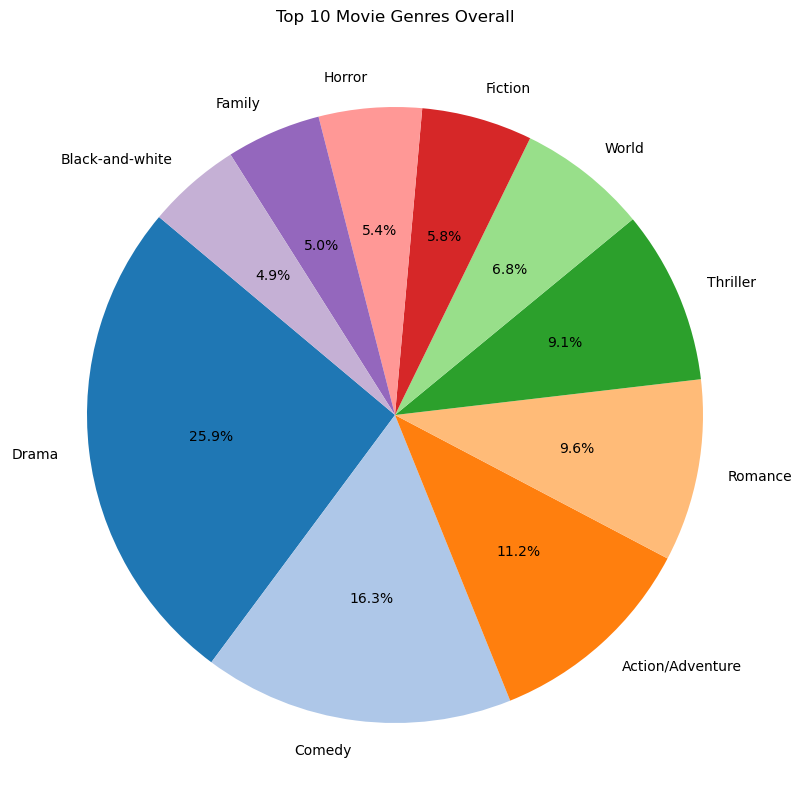

In [46]:
plot_top_genres_overall(10)